# 1日目飛行エリア定義

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os
import gistool
from math import pi, cos, sin
%matplotlib notebook

In [2]:
# 定数
POLE_RADIUS = 6356752.314   #極半径
EQUATOR_RADIUS = 6378137    #赤道半径

In [3]:
img = Image.open('comp/flight_area.jpg')
img = img.rotate(-90)
arr = np.array(img)

<IPython.core.display.Javascript object>


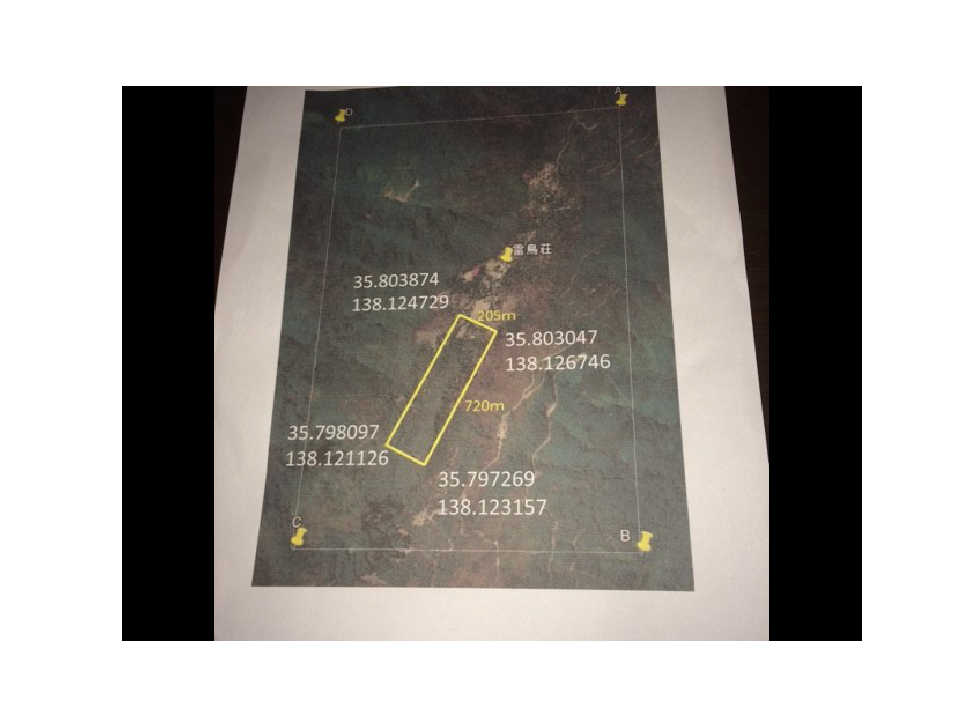

In [4]:
fig1 = plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
# 飛行エリアの四隅の定義（緯度、経度）
left_bottom = (35.798097, 138.121126) # pt1, 左下
right_bottom = (35.797269, 138.123157) # pt2, 右下
right_top = (35.803047, 138.126746) # pt3,右上
left_top = (35.803874, 138.124729) # pt4, 左上

# 四隅をnp.arrayにまとめる
corners = np.array([left_bottom, right_bottom, right_top, left_top])

# 飛行エリアの中心座標
lat_center, lon_center = corners.mean(axis=0)
center = (lat_center, lon_center)
print("center coords: {0:.7f} {1:.7f}".format(center[0], center[1]))

center coords: 35.8005718 138.1239395


In [6]:
MYLATITUDE = lat_center
MYLONGITUDE = lon_center
print("MYLATITUDE:", MYLATITUDE)
print("MYLONGITUDE:", MYLONGITUDE)

MYLATITUDE: 35.80057175
MYLONGITUDE: 138.1239395


In [7]:
# 雷鳥荘の座標
raichoso = (35.8062413,138.1265331)
print("雷鳥荘の座標: {0:.7f} {1:.7f}".format(raichoso[1], raichoso[0]))

# ホームポジションの座標
home = (35.803971,138.126082)
print("ホームポジションの座標: {0:.7f} {1:.7f}".format(home[1], home[0]))

# 全座標のまとめ
all_pts = np.vstack((corners, np.array(raichoso), np.array(home)))

雷鳥荘の座標: 138.1265331 35.8062413
ホームポジションの座標: 138.1260820 35.8039710


In [8]:
lat_max, lon_max = all_pts.max(axis=0)
print("lat_max, lon_max: ", lat_max, lon_max)
lat_min, lon_min = all_pts.min(axis=0)
print("lat_min, lon_min: ", lat_min, lon_min)

lat_max, lon_max:  35.8062413 138.126746
lat_min, lon_min:  35.797269 138.121126


In [9]:
lat_span = lat_max - lat_min
lon_span = lon_max - lon_min
lat_span, lon_span

(0.0089723000000034858, 0.005619999999993297)

In [10]:
np.vstack((corners, corners[0])).T

array([[  35.798097,   35.797269,   35.803047,   35.803874,   35.798097],
       [ 138.121126,  138.123157,  138.126746,  138.124729,  138.121126]])

<IPython.core.display.Javascript object>


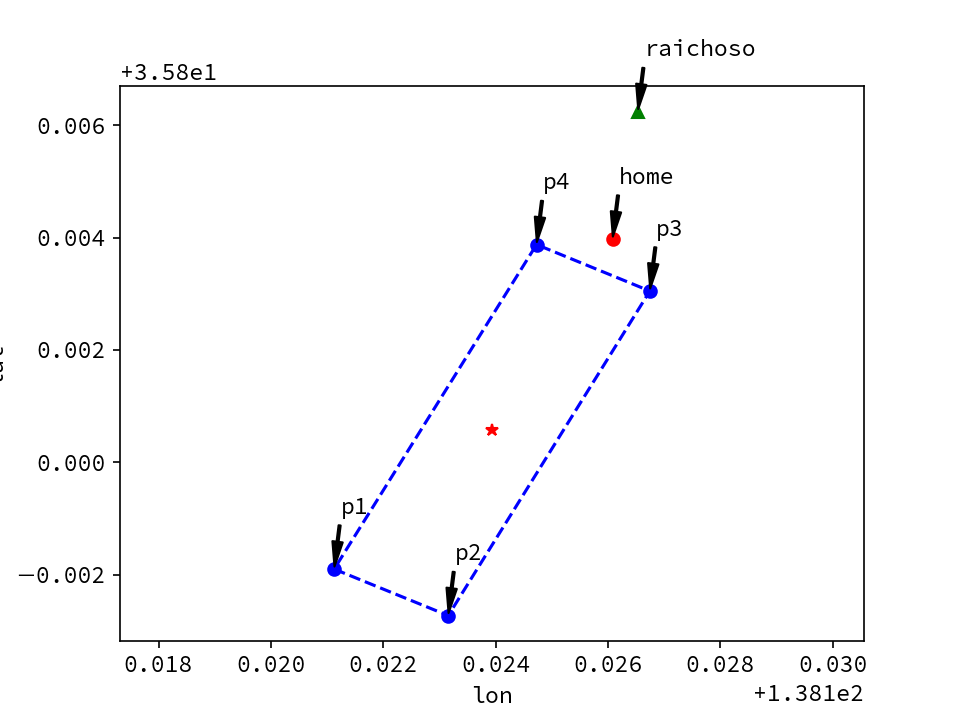

In [11]:
# 座標の簡易プロット
fig2 = plt.figure()
corners_T = corners.T
plt.plot(corners_T[1], corners_T[0], 'bo')
plt.plot(np.vstack((corners, corners[0])).T[1], np.vstack((corners, corners[0])).T[0], 'b--')
plt.plot(raichoso[1], raichoso[0], 'g^')
plt.plot(home[1], home[0], 'ro')
plt.plot(center[1], center[0], 'r*')
plt.xlim(lon_min - 0.1 * lon_span, lon_max + 0.1 * lon_span)
plt.ylim(lat_min - 0.1 * lat_span, lat_max + 0.1 * lat_span)

ann_pts = ['p1', 'p2', 'p3', 'p4']
for ann, x, y in zip(ann_pts, corners[:,1], corners[:,0]): # df['lon'].iloc[[0,-1]], df['lat'].iloc[[0,-1]]):
    plt.annotate(ann, xy=(x,y),
                xytext=(x+lon_span * 0.02, y+lat_span * 0.1),
                arrowprops=dict(facecolor='black', shrink = 0.05, width=1, headwidth=5),
                horizontalalignment='left', verticalalignment='bottom')

x, y = (raichoso[1], raichoso[0])
plt.annotate('raichoso', xy=(x,y),
            xytext=(x+lon_span * 0.02, y+lat_span * 0.1),
            arrowprops=dict(facecolor='black', shrink = 0.05, width=1, headwidth=5),
            horizontalalignment='left', verticalalignment='bottom')

x, y = (home[1], home[0])
plt.annotate('home', xy=(x,y),
            xytext=(x+lon_span * 0.02, y+lat_span * 0.1),
            arrowprops=dict(facecolor='black', shrink = 0.05, width=1, headwidth=5),
            horizontalalignment='left', verticalalignment='bottom')


plt.axis('equal')
plt.xlabel('lon')
plt.ylabel('lat')
plt.show()

## pt1を原点としてpt4の方位角を計算する
left_bottom = (35.798097, 138.121126) # pt1, 左下 <br>
left_top = (35.803874, 138.124729) # pt4, 左上

In [12]:
# pt1とpt4の経緯度差をdpとして計算する
pt1 = np.array((left_bottom[1], left_bottom[0]))
pt4 = np.array((left_top[1], left_top[0]))
print("start = pt1:", pt1)
print("end = pt4:", pt4)
dp = pt4 - pt1
dp

start = pt1: [ 138.121126   35.798097]
end = pt4: [ 138.124729   35.803874]


array([ 0.003603,  0.005777])

<IPython.core.display.Javascript object>


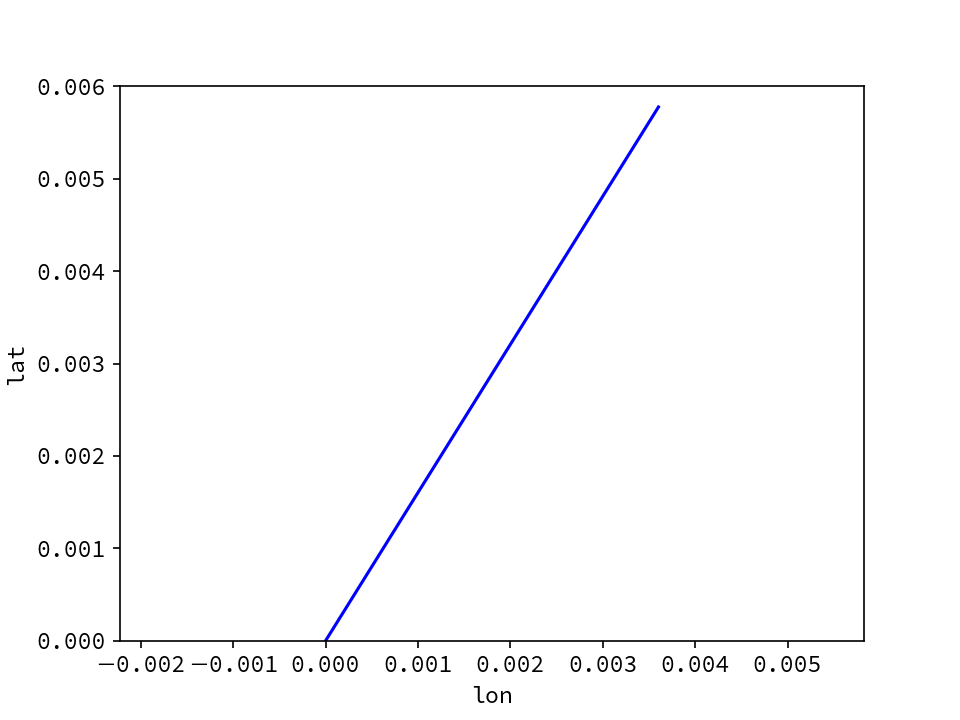

In [13]:
plt.figure()
plt.plot([0, dp[0]], [0, dp[1]], 'b-')
plt.axis('equal')
# plt.xlim(0,0.006)
plt.ylim(0,0.006)
plt.xlabel('lon')
plt.ylabel('lat')
plt.show()

## 方位角ベクトルの角度算出(1)　経緯度直接計算
ここでは極座標系を無視して、経度、緯度から直接、方位角を算出する <br>
ベクトルの大きさは **np.linalg.norm()** で計算できる <br>


In [14]:
np.linalg.norm(dp) == np.sqrt(dp[0]**2 + dp[1]**2)

True

In [15]:
north = np.array([0,1]) # 北向きの単位ベクトル
north

array([0, 1])

In [16]:
norm_dp = dp / np.linalg.norm(dp) # 経緯度の差で構成した単位ベクトル
print(norm_dp)
print(np.linalg.norm(norm_dp))

[ 0.52919336  0.84850126]
1.0


In [17]:
np.arccos(norm_dp.dot(north)) * 180 / pi

31.950969583807112

In [18]:
tan_fai = dp[1]/dp[0]
fai = 90 - np.arctan(tan_fai) * 180 / pi
print("fai = {:.1f}".format(fai))

fai = 32.0


答えとしては 32.0 °となる。<br>
しかし緯度の差の長さは、経度および緯度によらず、ほぼ変わらないが、<br>
経度の差の長さは、緯度によって大きく異なる。<br>
そのためこの計算方法は大きな誤りである。

## 方位角ベクトルの角度算出(2) メートル換算
次に極座標系をユークリッド幾何系に変換してから、角度を算出する

In [19]:
# 経度差、緯度差の定義
d_lon, d_lat = dp
d_lon, d_lat

(0.0036029999999982465, 0.0057770000000019195)

### 3つの条件
- i. 飛行エリア付近
- ii. 赤道付近（緯度0°）：赤道付近では経度の長さ単位が最大になる。上記の飛行エリア付近の値よりも長くなる。
- iii. 北極付近（緯度90°）：両極付近では経度は短くなり0に収束する。1°の差は0に近くなる。

i. 飛行エリア付近
MYLATITUDE: 35.80057175
dp_xy = (325.30248118165741, 640.93653023090928)
||dp_xy|| = 718.763758162
norm_dp_xy = [ 0.45258609  0.89172071]
fai_xy = 26.909726453


<IPython.core.display.Javascript object>


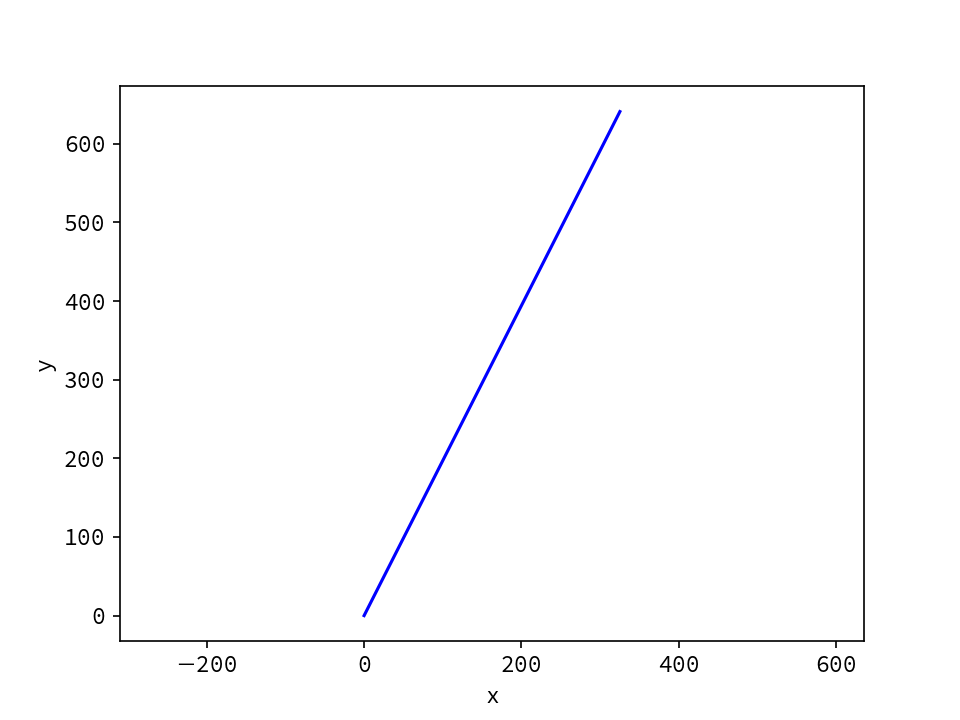

ii. 赤道付近
MYLATITUDE: 0
dp_xy = (401.08412532796945, 640.93653023090928)
||dp_xy|| = 756.087370199
norm_dp_xy = [ 0.53047325  0.84770168]
fai_xy = 32.0374360704


<IPython.core.display.Javascript object>


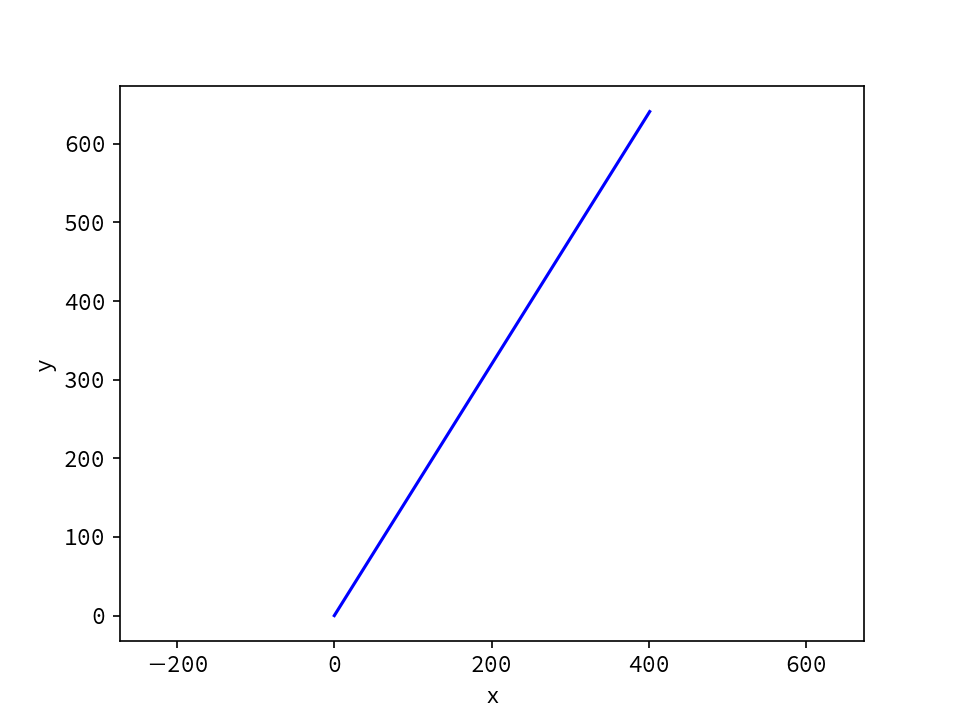

iii. 極付近
MYLATITUDE: 90
dp_xy = (2.4559319513585681e-14, 640.93653023090928)
||dp_xy|| = 640.936530231
norm_dp_xy = [  3.83178651e-17   1.00000000e+00]
fai_xy = 0.0


<IPython.core.display.Javascript object>


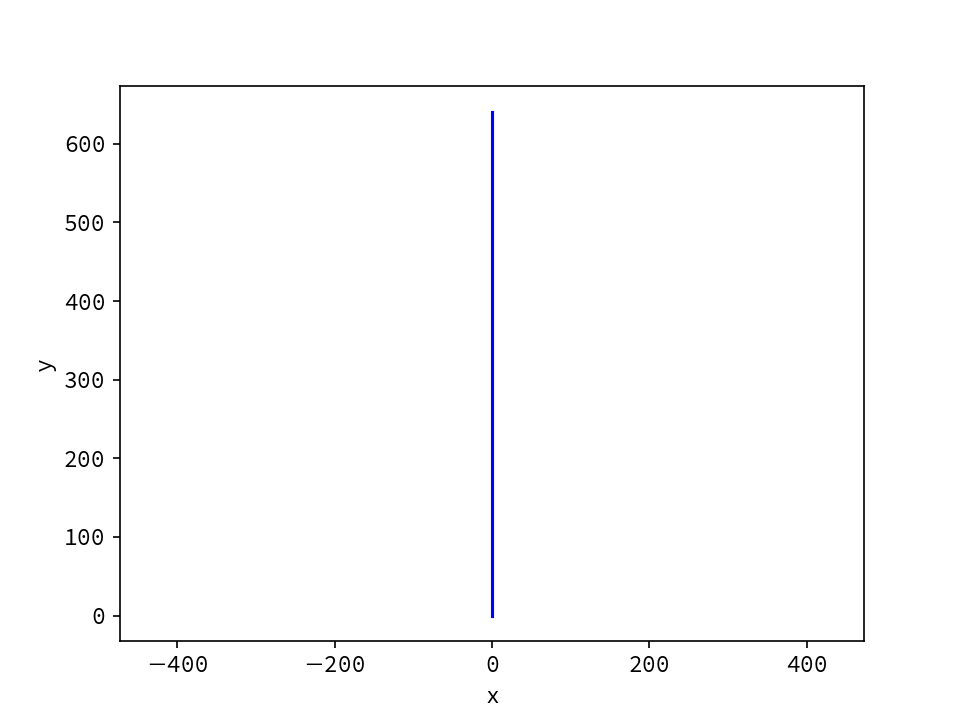

In [20]:
cases = ['i. 飛行エリア付近', 'ii. 赤道付近', 'iii. 極付近']
lat_lst = [lat_center, 0, 90]

result = []
for case, mylat in zip(cases, lat_lst):
    MYLATITUDE = mylat
    print(case)
    print("MYLATITUDE:", MYLATITUDE)

    def d_lat2dy(d_lat):
        dy = POLE_RADIUS * d_lat * pi / 180
        return dy

    def d_lon2dx(d_lon):
        dx = EQUATOR_RADIUS * cos(MYLATITUDE * pi / 180) * d_lon * pi / 180
        return dx

    dx = d_lon2dx(d_lon)
    dy = d_lat2dy(d_lat)
    dp_xy = np.array([dx, dy])
    print("dp_xy =", (dx, dy))
    print("||dp_xy|| =", (np.sqrt(dx ** 2 + dy ** 2)))

    norm_dp_xy = dp_xy / np.linalg.norm(dp_xy)
    print("norm_dp_xy =", norm_dp_xy)
    fai_xy = np.arccos(norm_dp_xy.dot(north)) * 180 / pi
    print("fai_xy =", fai_xy)
    result.append(fai_xy)

    plt.figure()
    plt.plot([0, dx], [0, dy], 'b-')
    plt.xlim(0,)
    plt.ylim(0,)
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [22]:
print("方位角の真値：{:.3f}".format(result[0]))

方位角の真値：26.910


## 結論
上記から緯度に対して経度差が変わることがわかる。今回の飛行エリアにおいて、<br>
左下の点（南西端）と左上の点（北西端）が北の向きとなす角度は、26.910°である。

In [25]:
real_ang = 180 - result[0]
print('ドローンの進行方位:{:.3f}'.format(real_ang))

ドローンの進行方位:153.090
